In [1]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import functions

In [2]:
keys=['Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD', 'M_BH', 'M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo']

In [3]:
len(keys)

70

In [4]:
df_full = pd.read_csv('SMBH_Data_0522.csv',header=1)

In [5]:
df = df_full[keys].dropna(axis='index',how='any')
df

Bar  Disk  Ring  Core  Multiple  Compactness  AGN  Pseudobulge  BCG  cD  \
1      0   0.0     0   1.0         0            0  1.0            0    1   0   
3      0   0.0     0   0.0         0            0  1.0            0    1   0   
5      1   1.0     0   0.0         0            0  0.0            0    0   0   
6      0   1.0     0   0.0         0            0  0.0            0    0   0   
7      0   1.0     0   1.0         0            0  0.0            0    1   0   
..   ...   ...   ...   ...       ...          ...  ...          ...  ...  ..   
132    1   1.0     0   0.0         0            0  0.0            1    0   0   
133    0   1.0     1   0.0         0            0  1.0            1    0   0   
134    0   1.0     0   0.0         0            0  1.0            1    0   0   
136    0   1.0     0   0.0         0            0  0.0            1    0   0   
142    1   1.0     0   0.0         0            0  1.0            1    1   0   

     ...  logblum  logSigma0sph  LogSigma0        R10    logR10  logR10phi  \
1    ...  10.7372      8.218084   4.704516  34.766963  1.541167  10.148833   
3    ...  11.1172      5.486389   4.033710  18.612540  1.269806  10.470194   
5    ...  10.2816      6.294257   3.790449   9.360143  0.971282   9.791918   
6    ...   8.7472      4.025433   4.008665   0.697465 -0.156477   9.346477   
7    ...  10.7976      3.648904   4.059098  11.966130  1.077954  10.302046   
..   ...      ...           ...        ...        ...       ...        ...   
132  ...  10.8796      8.242104   4.714507  18.008377  1.255475  10.014525   
133  ...  10.0440      4.922064   4.836918   8.813445  0.945146   9.564854   
134  ...   9.9796      4.021619   4.798361  10.510415  1.021620   9.718380   
136  ...  10.5304      4.140150   4.714823  16.634078  1.220999   9.589001   
142  ...  10.3896      5.408371   4.731652  16.803388  1.225397   9.674603   

           Rh     logRh   logRhphi    logHalo  
1    8.079469  0.907383  10.782617  13.959319  
3    7.044676  0.847861  10.892139  14.060462  
5    1.618051  0.208992  10.554208  12.563130  
6    0.365014 -0.437691   9.627691  11.525458  
7    2.962211  0.471616  10.908384  13.405242  
..        ...       ...        ...        ...  
132  2.434609  0.386429  10.883571  13.233744  
133  0.942243 -0.025837  10.535837  12.289895  
134  1.828245  0.262034  10.477966  12.536387  
136  3.155569  0.499078  10.310922  12.618079  
142  1.863375  0.270300  10.629700  12.727499  

[100 rows x 70 columns]

In [6]:
keys.remove('M_BH')

In [7]:
X = df[keys]
y = df['M_BH']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training Set RMSE:  0.16928349114724625
Test Set RMSE:  0.33025423312957003


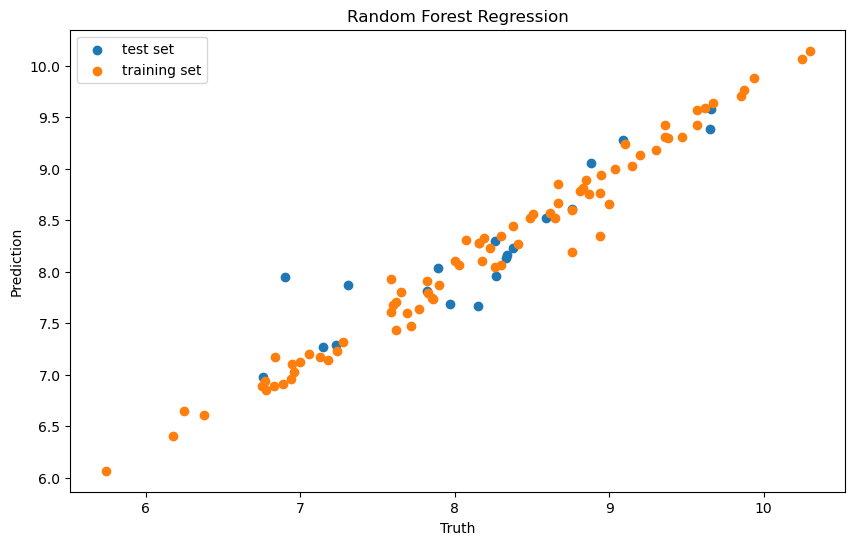

In [47]:
# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

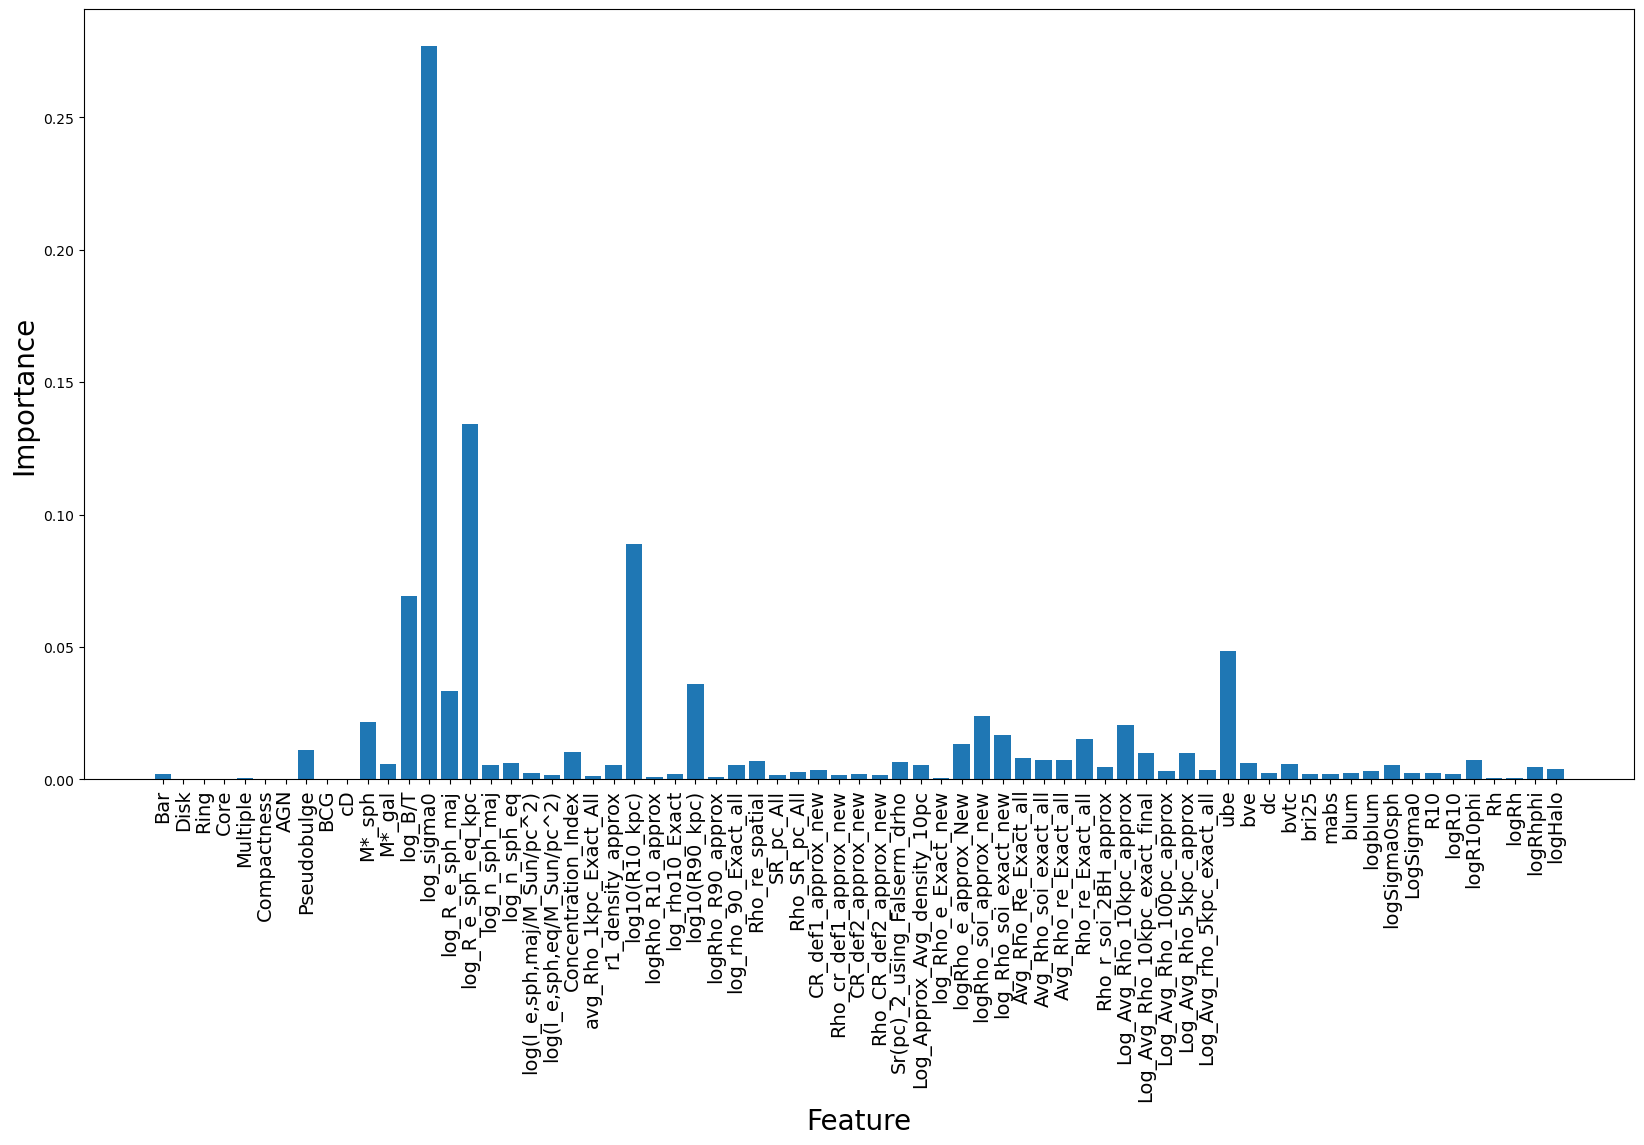

In [48]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(69)
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()


In [31]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
importance_order

array([13, 15, 23, 12, 52, 26, 14, 40, 10, 47, 41, 45, 39,  7, 20, 48, 50,
       42, 64, 44, 43, 29, 36, 17, 53, 11, 55, 28, 22, 37, 16, 60, 67, 46,
       68, 51, 32, 49, 59, 31, 54, 61, 62, 18, 58,  0, 56, 57, 34, 63, 25,
       35, 33, 30, 19, 21, 27, 24, 66, 65,  4, 38,  8,  9,  3,  6,  2,  1,
        5])

In [32]:
for i in range(len(importance_order)):
    print(i+1,X.columns[importance_order[i]],importance[i])

1 log_sigma0 0.27695167502525925
2 log_R_e_sph_eq_kpc 0.1342486869670756
3 log10(R10_kpc) 0.08885268104702265
4 log_B/T 0.06920631715838862
5 ube 0.0485851175765438
6 log10(R90_kpc) 0.036154486527223986
7 log_R_e_sph_maj 0.03353793704205425
8 logRho_soi_approx_new 0.02384676275035487
9 M*_sph 0.021634333950321386
10 Log_Avg_Rho_10kpc_approx 0.020486502950576736
11 log_Rho_soi_exact_new 0.016867260862868202
12 Rho_re_Exact_all 0.015243697694192846
13 logRho_e_approx_New 0.01348741034364355
14 Pseudobulge 0.01104404093308889
15 Concentration_Index 0.010340069169153596
16 Log_Avg_Rho_10kpc_exact_final 0.009999723291754548
17 Log_Avg_Rho_5kpc_approx 0.009901240315711487
18 Avg_Rho_Re_Exact_all 0.008036315961950367
19 logR10phi 0.007293000357793209
20 Avg_Rho_re_Exact_all 0.007230926879352517
21 Avg_Rho_soi_exact_all 0.007128625851073037
22 Rho_re_spatial 0.007036813831351856
23 Sr(pc)_2_using_Falserm_drho 0.006655398505468967
24 log_n_sph_eq 0.006296329266229306
25 bve 0.00609565955099991


In [33]:
X.columns[importance_order][:10]

Index(['log_sigma0', 'log_R_e_sph_eq_kpc', 'log10(R10_kpc)', 'log_B/T', 'ube',
       'log10(R90_kpc)', 'log_R_e_sph_maj', 'logRho_soi_approx_new', 'M*_sph',
       'Log_Avg_Rho_10kpc_approx'],
      dtype='object')

In [48]:
#from sklearn.decomposition import PCA
#pcs = PCA().fit_transform(X)

In [34]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 400],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree (None for unlimited)
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': [1.0, 'sqrt', 'log2'],  # Number of features to consider when splitting
    'bootstrap': [True, False]  # Whether to bootstrap samples when building trees
}


# Choose a scoring metric (e.g., Mean Squared Error)
scoring = 'neg_mean_squared_error'

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=scoring, cv=5)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [35]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_rmse = functions.rmse(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test MSE with Best Model:", test_rmse)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test MSE with Best Model: 0.46880054413423683


In [47]:
functions.test_relation(['log_sigma0', 'log_R_e_sph_eq_kpc', 'log10(R10_kpc)', 'log_B/T', 'ube',
       'log10(R90_kpc)', 'log_R_e_sph_maj', 'logRho_soi_approx_new', 'M*_sph',
       'Log_Avg_Rho_10kpc_approx'])

104


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_R_e_sph_eq_kpc
x 2 : log10(R10_kpc)
x 3 : log_B/T
x 4 : ube
x 5 : log10(R90_kpc)
x 6 : log_R_e_sph_maj
x 7 : logRho_soi_approx_new
x 8 : M*_sph
x 9 : Log_Avg_Rho_10kpc_approx
Eq. selected rmse: 0.23467080671015766


2.705383394401989*x0 + x3 - 0.4312832943643069*x7 + 3.6815211157292502

Eq. 0 rmse: 0.9172014405196002


8.252746645954334

Eq. 1 rmse: 0.4094850455557965


x8 - 2.35742179413685

Eq. 2 rmse: 0.3845110338836249


x4 + x8 - 2.7617631509185183

Eq. 3 rmse: 0.35740863506973974


x8 - 2.7617631509185183 + 0.9684726697028194/x7

Eq. 4 rmse: 0.3512769094851374


-1.689130930827019*x7/x8 + x8 - 1.977342137558972

Eq. 5 rmse: 0.2994831953551277


3.677235686880364*x0 + x6/x7 - 0.2720444467717317

Eq. 6 rmse: 0.27831812468419287


3.5464197592749183*x0 + x6/(x2 + x7)

Eq. 7 rmse: 0.26906192406016527


3.4319961761520095*x0 + 0.5195224106182587*x6 + 0.7597962891351768/x7

Eq. 8 rmse: 0.26012657654893917


3.7221070938598737*x0 + 0.3563857822898219*x1 - 0.3563857822898219*x7 + 0.69306271991924239

Eq. 9 rmse: 0.23467080671015766


2.705383394401989*x0 + x3 - 0.4312832943643069*x7 + 3.6815211157292502

In [65]:
keys_copy=keys.copy()

In [59]:
functions.test_relation(keys_copy)

100


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : Bar
x 1 : Disk
x 2 : Ring
x 3 : Core
x 4 : Multiple
x 5 : Compactness
x 6 : AGN
x 7 : Pseudobulge
x 8 : BCG
x 9 : cD
x 10 : M*_sph
x 11 : M*_gal
x 12 : log_B/T
x 13 : log_sigma0
x 14 : log_R_e_sph_maj
x 15 : log_R_e_sph_eq_kpc
x 16 : log_n_sph_maj
x 17 : log_n_sph_eq
x 18 : log(I_e,sph,maj/M_Sun/pc^2)
x 19 : log(I_e,sph,eq/M_Sun/pc^2)
x 20 : Concentration_Index
x 21 : avg_Rho_1kpc_Exact_All
x 22 : r1_density_approx
x 23 : log10(R10_kpc)
x 24 : logRho_R10_approx
x 25 : log_rho10_Exact
x 26 : log10(R90_kpc)
x 27 : logRho_R90_approx
x 28 : log_rho_90_Exact_all
x 29 : Rho_re_spatial
x 30 : SR_pc_All
x 31 : Rho_SR_pc_All
x 32 : CR_def1_approx_new
x 33 : Rho_cr_def1_approx_new
x 34 : CR_def2_approx_new
x 35 : Rho_CR_def2_approx_new
x 36 : Sr(pc)_2_using_Falserm_drho
x 37 : Log_Approx_Avg_density_10pc
x 38 : log_Rho_e_Exact_new
x 39 : logRho_e_approx_New
x 40 : logRho_soi_approx_new
x 41 : log_Rho_soi_exact_new
x 42 : Avg_Rho_Re_Exact_all
x 43 : Avg_Rho_soi_exact_all
x 44 : 

x10 - 0.20188901310327936*x19*(-x37 + x40) - 0.20188901310327936*x37 - 0.20188901310327936*x51 - 2.336809511632636

Eq. 0 rmse: 0.9082611474700466


8.233873226495978

Eq. 1 rmse: 0.3773721087118079


x10 - 2.3757319348325288

Eq. 2 rmse: 0.3606442903645438


x10 + x55 - 3.147268006628642

Eq. 3 rmse: 0.27473733188147814


x10 - 0.3679392209446764*x40 - 1.3895541061659271

Eq. 4 rmse: 0.2702507744803422


x10 - 0.3679392209446764*x2 - 0.3679392209446764*x40 - 1.3895541061659271

Eq. 5 rmse: 0.25660650446167227


x10 - 0.12786383016152292*x19*(-x37 + x40) - 2.697386924697038

Eq. 6 rmse: 0.24118821821286135


x10 - 0.10575909865778302*x19*(-x37 + x40) - 0.10575909865778302*x40 - 2.3125355367228364

Eq. 7 rmse: 0.20496373174632507


x10 - 0.20188901310327936*x19*(-x37 + x40) - 0.20188901310327936*x37 - 0.20188901310327936*x51 - 2.336809511632636

Eq. 8 rmse: 0.18330358147178966


0.77674744322883232*x10 - 0.22325255677116768*x19*(-x37 + x40) - 0.22325255677116768*x49 + 0.0074706233390812453

In [75]:
functions.test_relation(keys_copy,niterations=1000)

100


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : Bar
x 1 : Disk
x 2 : Ring
x 3 : Core
x 4 : Multiple
x 5 : Compactness
x 6 : AGN
x 7 : Pseudobulge
x 8 : BCG
x 9 : cD
x 10 : M*_sph
x 11 : M*_gal
x 12 : log_B/T
x 13 : log_sigma0
x 14 : log_R_e_sph_maj
x 15 : log_R_e_sph_eq_kpc
x 16 : log_n_sph_maj
x 17 : log_n_sph_eq
x 18 : log(I_e,sph,maj/M_Sun/pc^2)
x 19 : log(I_e,sph,eq/M_Sun/pc^2)
x 20 : Concentration_Index
x 21 : avg_Rho_1kpc_Exact_All
x 22 : r1_density_approx
x 23 : log10(R10_kpc)
x 24 : logRho_R10_approx
x 25 : log_rho10_Exact
x 26 : log10(R90_kpc)
x 27 : logRho_R90_approx
x 28 : log_rho_90_Exact_all
x 29 : Rho_re_spatial
x 30 : SR_pc_All
x 31 : Rho_SR_pc_All
x 32 : CR_def1_approx_new
x 33 : Rho_cr_def1_approx_new
x 34 : CR_def2_approx_new
x 35 : Rho_CR_def2_approx_new
x 36 : Sr(pc)_2_using_Falserm_drho
x 37 : Log_Approx_Avg_density_10pc
x 38 : log_Rho_e_Exact_new
x 39 : logRho_e_approx_New
x 40 : logRho_soi_approx_new
x 41 : log_Rho_soi_exact_new
x 42 : Avg_Rho_Re_Exact_all
x 43 : Avg_Rho_soi_exact_all
x 44 : 

x10 - 0.4845806405330377*x14 + x16 - 0.4845806405330377*x40 - 1.4785718969971269

Eq. 0 rmse: 0.9082611474700466


8.233873226494863

Eq. 1 rmse: 0.3773721087118079


x10 - 2.3757319297758697

Eq. 2 rmse: 0.329364648861592


x10 + x13 - 4.6296243614000465

Eq. 3 rmse: 0.2747373318814779


x10 - 0.36793922385376204*x40 - 1.3895540981968173

Eq. 4 rmse: 0.24347271074940277


x10 - 0.4136912966095676*x10/x37 - 0.4136912966095676*x40

Eq. 5 rmse: 0.2096158879603324


x10 - 0.4845806405330377*x14 + x16 - 0.4845806405330377*x40 - 1.4785718969971269

Eq. 6 rmse: 0.20846228882003945


x10 - 0.48132739586992035*x14 + x16 - 0.48132739586992035*x40 + x5 - 1.4891093574809058

Eq. 7 rmse: 0.1906803381085336


x10 - 0.5320069421644367*x14 + x16 - 0.5320069421644367*x40 - 1.2729813146372717 - 0.5320069421644367*x64/x30

Eq. 8 rmse: 0.18654943475558458


x10 - 0.5603580029476135*x14 + x16 - 0.5603580029476135*x40 - 0.5603580029476135*x62/(x13 + x32) - 1.1211527103964756

Eq. 9 rmse: 0.18081230444251042


x10 - 0.5826042899081154*x14 + x16 - 0.5826042899081154*x40 - 1.0449001842687675 - 0.5826042899081154*(x44 + x62)/(x32 + x35)

Eq. 10 rmse: 0.17982034126748228


x10 - 0.5816871035431532*x14 + x16 - 0.5816871035431532*x40 - 1.0549280688700249 - 0.5816871035431532*(2*x45 + x62)/(x32 + x35)